# Import packets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AveragePooling2D
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

Using TensorFlow backend.


# Load data

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
Y_train = train['label']
Y_train = to_categorical(Y_train,num_classes = 10)
X_train = train.drop(labels=['label'], axis=1)


# Normalize data and reshape

In [4]:
X_train /= 255.
test /= 255.
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [5]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

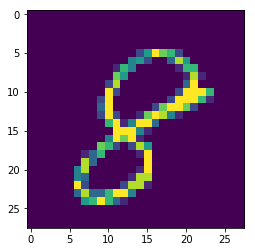

In [6]:
 plt.imshow(X_train[0][:,:,0])

# CNN

In [7]:
# Set the CNN model 
# my CNN architechture is In -> Conv2D->relu -> MaxPool2D -> Conv2D->relu -> AvgPool2D -> Conv2D->relu ->Flatten -> Dense ->  Out

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size= (2,2)))
model.add(Conv2D(filters = 64, kernel_size = (2,2), padding = 'Same',
                 activation = 'relu'))
model.add(AveragePooling2D(pool_size= (2,2)))
model.add(Conv2D(filters = 64, kernel_size = (2,2), padding = 'Same',
                 activation = 'relu'))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [8]:
optimizer = Adam(lr=0.01,epsilon=1e-8)

In [9]:
model.compile(optimizer=optimizer,loss='categorical_crossentropy', metrics=["accuracy"])

In [10]:
history = model.fit(X_train, Y_train, batch_size = 32, epochs = 10, 
          validation_data = (X_val, Y_val), verbose = 2)

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
 - 47s - loss: 0.3553 - acc: 0.8943 - val_loss: 0.2155 - val_acc: 0.9345
Epoch 2/10
 - 48s - loss: 0.1981 - acc: 0.9491 - val_loss: 0.2369 - val_acc: 0.9417
Epoch 3/10
 - 51s - loss: 0.1947 - acc: 0.9511 - val_loss: 0.1796 - val_acc: 0.9552
Epoch 4/10
 - 48s - loss: 0.1839 - acc: 0.9548 - val_loss: 0.1911 - val_acc: 0.9586
Epoch 5/10
 - 50s - loss: 0.1837 - acc: 0.9557 - val_loss: 0.1352 - val_acc: 0.9690
Epoch 6/10
 - 52s - loss: 0.1785 - acc: 0.9574 - val_loss: 0.1214 - val_acc: 0.9676
Epoch 7/10
 - 47s - loss: 0.1818 - acc: 0.9577 - val_loss: 0.1760 - val_acc: 0.9621
Epoch 8/10
 - 47s - loss: 0.1822 - acc: 0.9575 - val_loss: 0.1564 - val_acc: 0.9621
Epoch 9/10
 - 49s - loss: 0.1925 - acc: 0.9575 - val_loss: 0.1791 - val_acc: 0.9645
Epoch 10/10
 - 52s - loss: 0.1664 - acc: 0.9628 - val_loss: 0.1708 - val_acc: 0.9683
